# Autoencoder

In [1]:
import numpy as np

from keras.preprocessing.image import img_to_array
from keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Sequential
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt

np.random.seed(42)

img_size=256


img_data=[]

2022-07-14 10:17:58.405397: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-14 10:17:58.405460: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
img=cv2.imread('4.png', 1)
#rgb_img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
rgb_img=cv2.resize(img, (256,256))
img_data.append(img_to_array(rgb_img))
img_final=np.reshape(img_data, (len(img_data),256, 256, 3))
#img_final_2=img_final.astype('float32')/255
img_final_2=tf.cast(img_final, tf.float32)

2022-07-14 10:18:01.393423: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/pablogracia/.pyenv/versions/3.8.12/envs/upscaling/lib/python3.8/site-packages/cv2/../../lib64:
2022-07-14 10:18:01.393514: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-07-14 10:18:01.393542: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (PabloGracia7): /proc/driver/nvidia/version does not exist
2022-07-14 10:18:01.394078: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate

In [3]:
model=Sequential()

model.add(Conv2D(128, (3,3), activation='relu', padding='same', input_shape=(256,256,3)))
model.add(MaxPooling2D((2,2), padding='same'))
model.add(Conv2D(64, (3,3),activation='relu',padding='same'))
model.add(MaxPooling2D((2,2), padding='same'))
model.add(Conv2D(32, (3,3),activation='relu',padding='same'))
model.add(MaxPooling2D((2,2), padding='same'))

model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2,2)))

model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2,2)))

model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2,2)))

model.add(Conv2D(3, (3,3), activation='relu', padding='same'))

In [4]:
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])

model.summary()

model.fit(img_final_2, img_final, epochs=100, shuffle=True)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 128)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 32)       0

2022-07-14 10:18:02.427779: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 301989888 exceeds 10% of free system memory.
2022-07-14 10:18:02.428325: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 301989888 exceeds 10% of free system memory.


1/1 [==============================] - 1s 1s/step - loss: 23223.1816 - accuracy: 0.1753
Epoch 2/100


2022-07-14 10:18:02.975630: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 301989888 exceeds 10% of free system memory.
2022-07-14 10:18:02.975776: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 301989888 exceeds 10% of free system memory.


1/1 [==============================] - 1s 525ms/step - loss: 14713.6426 - accuracy: 0.4160
Epoch 3/100


2022-07-14 10:18:03.486202: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 301989888 exceeds 10% of free system memory.


1/1 [==============================] - 1s 540ms/step - loss: 2591.8855 - accuracy: 0.2036
Epoch 4/100
1/1 [==============================] - 1s 542ms/step - loss: 28685.7773 - accuracy: 0.1898
Epoch 5/100
1/1 [==============================] - 0s 459ms/step - loss: 2712.0530 - accuracy: 0.6296
Epoch 6/100
1/1 [==============================] - 0s 494ms/step - loss: 2872.3623 - accuracy: 0.6785
Epoch 7/100
1/1 [==============================] - 1s 513ms/step - loss: 6931.7368 - accuracy: 0.6895
Epoch 8/100
1/1 [==============================] - 0s 472ms/step - loss: 9586.6250 - accuracy: 0.6919
Epoch 9/100
1/1 [==============================] - 1s 520ms/step - loss: 10744.1357 - accuracy: 0.6918
Epoch 10/100
1/1 [==============================] - 1s 511ms/step - loss: 10727.5547 - accuracy: 0.6938
Epoch 11/100
1/1 [==============================] - 1s 581ms/step - loss: 9689.4609 - accuracy: 0.6961
Epoch 12/100
1/1 [==============================] - 1s 620ms/step - loss: 7728.7373 - acc

1/1 [==============================] - 0s 433ms/step - loss: 292.2688 - accuracy: 0.7026
Epoch 84/100
1/1 [==============================] - 0s 452ms/step - loss: 291.1181 - accuracy: 0.6984
Epoch 85/100
1/1 [==============================] - 1s 586ms/step - loss: 286.0451 - accuracy: 0.6955
Epoch 86/100
1/1 [==============================] - 1s 650ms/step - loss: 277.5851 - accuracy: 0.6907
Epoch 87/100
1/1 [==============================] - 1s 521ms/step - loss: 271.9786 - accuracy: 0.6946
Epoch 88/100
1/1 [==============================] - 0s 475ms/step - loss: 268.6287 - accuracy: 0.7026
Epoch 89/100
1/1 [==============================] - 0s 486ms/step - loss: 268.1893 - accuracy: 0.7076
Epoch 90/100
1/1 [==============================] - 0s 472ms/step - loss: 268.8621 - accuracy: 0.7117
Epoch 91/100
1/1 [==============================] - 0s 458ms/step - loss: 281.7147 - accuracy: 0.7122
Epoch 92/100
1/1 [==============================] - 0s 452ms/step - loss: 265.8870 - accuracy: 

In [5]:
pred=model.predict(img_final)

final_pred=tf.cast(pred, tf.int8)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


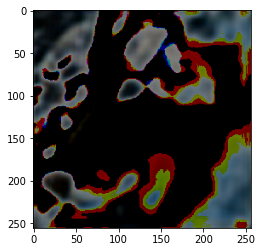

In [6]:
plt.imshow(final_pred[0])

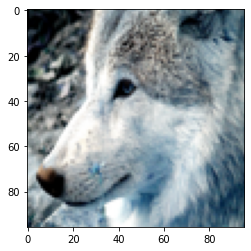

In [7]:
plt.imshow(img)

In [8]:
final_pred.shape

TensorShape([1, 256, 256, 3])

In [9]:
pred

array([[[[  4.2621183,   6.3507323,   6.808475 ],
         [  7.614935 ,   7.8146853,  11.455268 ],
         [  9.577477 ,  11.678284 ,  13.254777 ],
         ...,
         [ 84.27847  , 108.00975  , 114.842995 ],
         [ 74.21014  ,  95.51642  , 109.95164  ],
         [ 54.47457  ,  76.81438  ,  78.56939  ]],

        [[  7.10216  ,   8.216309 ,   9.179338 ],
         [  9.136972 ,  10.651036 ,  14.164809 ],
         [ 11.442084 ,  13.6832695,  16.160479 ],
         ...,
         [ 93.77296  , 120.44582  , 115.27923  ],
         [ 81.617584 , 115.56243  , 117.293976 ],
         [ 67.41919  ,  95.46689  ,  92.31782  ]],

        [[  6.976709 ,  10.253774 ,  11.432224 ],
         [  9.4264   ,  13.0263195,  17.839367 ],
         [ 11.330781 ,  16.225163 ,  19.598255 ],
         ...,
         [ 92.46197  , 118.42177  , 121.64794  ],
         [ 82.70425  , 116.86943  , 124.272285 ],
         [ 71.06222  ,  98.66098  ,  98.5756   ]],

        ...,

        [[ 29.420229 ,  37.94494  ,  3